# CIFAR-10 Multiple Class
Example of using Keras and building out CNNs. This time will use another famous data set, the CIFAR-10 dataset which consists of 10 different image types.

In [1]:
import pandas as pd
import numpy as np

# The Data

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 30s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train[0].shape

(32, 32, 3)

In [5]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

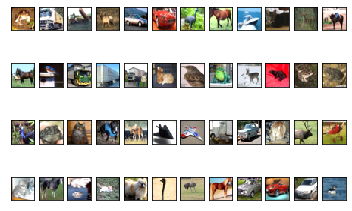

In [56]:
for i in range(48):
    plt.subplot(4,12,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
plt.show()

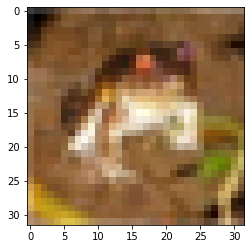

In [6]:
# FROG
plt.imshow(x_train[0])

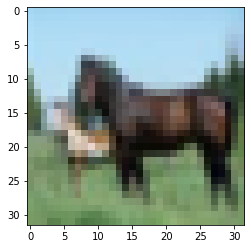

In [7]:
# HORSE
plt.imshow(x_train[12])

# Data PreProcessing

In [8]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [9]:
x_train[0].shape

(32, 32, 3)

In [10]:
x_train.max()

255

In [11]:
x_train = x_train/225

In [12]:
x_test = x_test/255

In [13]:
x_train.shape

(50000, 32, 32, 3)

In [14]:
x_test.shape

(10000, 32, 32, 3)

## Labels

In [15]:
from tensorflow.keras.utils import to_categorical

In [18]:
y_train.shape

(50000, 1)

In [21]:
y_train[0]

array([6], dtype=uint8)

In [23]:
y_cat_train = to_categorical(y_train,10)

In [27]:
y_cat_train.shape

(50000, 10)

In [28]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [29]:
y_cat_test = to_categorical(y_test,10)

----------
# Building the Model

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [32]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (WE CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

**Patience, i.e. the number of epochs to wait before early stop if no progress on the validation set. The patience is often set somewhere between 10 and 100 (10 or 20 is more common), but it really depends on your dataset and network**

In [38]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 17s 342us/sample - loss: 1.5231 - accuracy: 0.4540 - val_loss: 1.2762 - val_accuracy: 0.5322
Epoch 2/15
50000/50000 [==============================] - 9s 186us/sample - loss: 1.1743 - accuracy: 0.5886 - val_loss: 1.0667 - val_accuracy: 0.6263
Epoch 3/15
50000/50000 [==============================] - 9s 187us/sample - loss: 1.0195 - accuracy: 0.6467 - val_loss: 1.0996 - val_accuracy: 0.6235
Epoch 4/15
50000/50000 [==============================] - 10s 191us/sample - loss: 0.9125 - accuracy: 0.6859 - val_loss: 0.9953 - val_accuracy: 0.6610
Epoch 5/15
50000/50000 [==============================] - 10s 194us/sample - loss: 0.8349 - accuracy: 0.7138 - val_loss: 0.9845 - val_accuracy: 0.6633
Epoch 6/15
50000/50000 [==============================] - 10s 191us/sample - loss: 0.7641 - accuracy: 0.7414 - val_loss: 1.0060 - val_accuracy: 0.6656
Epoch 7/15
50000/50000 [======================

In [42]:
# Careful, don't overwrite our file!
# model.save('cifar_10epochs.h5')

In [39]:
losses = pd.DataFrame(model.history.history)

In [40]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.523105,0.45398,1.276188,0.5322
1,1.174281,0.58864,1.066685,0.6263
2,1.019539,0.64666,1.099594,0.6235
3,0.912482,0.68594,0.995297,0.6610
4,0.834864,0.71382,0.984460,0.6633


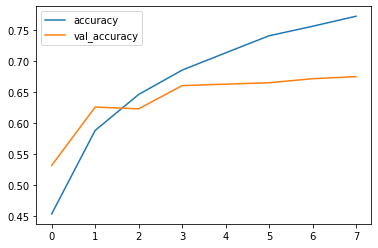

In [41]:
losses[['accuracy','val_accuracy']].plot()

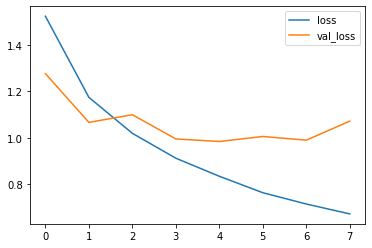

In [42]:
losses[['loss','val_loss']].plot()

In [43]:
model.metrics_names

['loss', 'accuracy']

In [44]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[1.072062519645691, 0.6755]


In [45]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict_classes(x_test)

In [46]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.69      0.73      0.71      1000
           1       0.66      0.89      0.76      1000
           2       0.60      0.59      0.60      1000
           3       0.47      0.60      0.52      1000
           4       0.67      0.63      0.65      1000
           5       0.69      0.41      0.52      1000
           6       0.86      0.67      0.75      1000
           7       0.71      0.74      0.73      1000
           8       0.79      0.73      0.76      1000
           9       0.73      0.76      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.67     10000
weighted avg       0.69      0.68      0.67     10000



In [47]:
confusion_matrix(y_test,predictions)

array([[728,  53,  58,  17,  29,   3,   2,   4,  68,  38],
       [  9, 893,   4,   7,   0,   1,   4,   9,   6,  67],
       [ 62,  23, 594, 101,  69,  33,  35,  42,  27,  14],
       [ 27,  39,  67, 597,  58,  74,  28,  58,  24,  28],
       [ 37,  26,  70,  89, 627,  27,  21,  72,  19,  12],
       [ 23,  22,  79, 274,  49, 414,  12,  93,  18,  16],
       [ 19,  28,  63, 106,  57,  13, 667,  16,   9,  22],
       [ 29,  23,  35,  53,  43,  25,   3, 744,   3,  42],
       [ 92,  89,  13,  14,   6,   5,   3,   6, 731,  41],
       [ 32, 147,   5,  23,   2,   1,   4,   8,  18, 760]], dtype=int64)

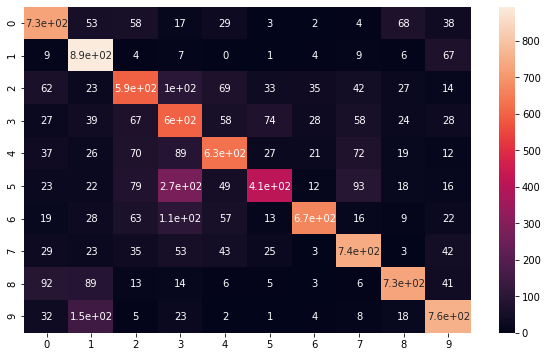

In [48]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
# https://github.com/matplotlib/matplotlib/issues/14751

# Predicting a given image

In [49]:
my_image = x_test[16]

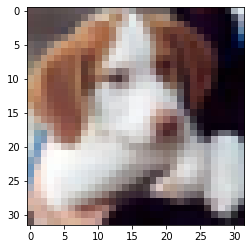

In [50]:
plt.imshow(my_image)

In [51]:
# SHAPE --> (num_images,width,height,color_channels)
model.predict_classes(my_image.reshape(1,32,32,3))

array([5], dtype=int64)

In [52]:
# 5 is DOG
# https://www.cs.toronto.edu/~kriz/cifar.html